# Etape 8 : Application : Etude de la chute d'une balle lachée par un cycliste en mouvement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [2]:
def charge_fichier_csv(cheminfichier, delimiter=";",N=0):
    with open(cheminfichier, 'r', encoding='utf-8') as f :
        rfichier = csv.reader(f, delimiter=delimiter)
        tab=[]
        index_row=0
        for row in rfichier:            
            if index_row < N:
                index_row = index_row+1
            else : 
                for i in range (len(row)): 
                    if len(tab) <= i:
                        X = []       
                        tab.append(X) 
                    try:
                        tab[i].append(float(row[i].replace(",",'.')))    
                    except ValueError:
                        print('erreur:contenu de cellule non numérique')
                        continue
            
    return tab

In [3]:
def model_polynome_deg2(u,v):
    u=np.array(u)
    v=np.array(v)
    coeff=np.polyfit(u,v,2)
    vmodel=coeff[0]*u**2+coeff[1]*u+coeff[2]
    return vmodel

In [4]:
def derivee(t,u):
    du=[]
    for i in range (len(u)-1):
        dui=(u[i+1]-u[i])/(t[i+1]-t[i])
        du.append(dui)
    return du

In [5]:
def graphvect(x,y,ymodel,vx,vy):
    fig = plt.figure(1,figsize=(10,12))
    plt.plot(x,y,'r+',label='y=f(x)')
    plt.plot(x,ymodel,'g-',label='modèle polynôme de degré 2')
    plt.xlim(0,max(x)+0.5)
    plt.ylim(0,max(y)+0.5)
    plt.grid()
    plt.xlabel("x(m)")
    plt.ylabel("y(m)")
    plt.legend()
    for i in range (len (vx)) :
        plt.arrow(x[i],y[i],0.03*vx[i],0.03*vy[i],fc='b',
                  ec='b',head_width=0.02,
                  length_includes_head=True)
    plt.title("Modélisation et tracé des vecteurs vitesse instantanée")
    plt.show()

[0.76, 0.8, 0.84, 0.88, 0.92, 0.96, 1.0, 1.04, 1.08, 1.12, 1.16, 1.2, 1.24, 1.28, 1.32, 1.36]
[0.00865710739046, 0.106770991149, 0.204884874908, 0.302998758666, 0.398226939961, 0.493455121256, 0.588683302551, 0.675254376456, 0.767596855287, 0.857053631656, 0.946510408024, 1.03019577946, 1.11676685337, 1.19756652235, 1.27836619132, 1.36205156277]
[1.98247759242, 1.97093478256, 1.94496346039, 1.89590651851, 1.83530676678, 1.7545070978, 1.66216461897, 1.55827933028, 1.43707982682, 1.29568040611, 1.15139528293, 0.984024540049, 0.807996689776, 0.605997517332, 0.403998344888, 0.187570660127]
[1.97254171 1.96885614 1.94560635 1.90279235 1.84252803 1.7638334
 1.66670847 1.56241984 1.43438997 1.29383467 1.13701536 0.97558948
 0.7936194  0.61003832 0.41318878 0.19532115]


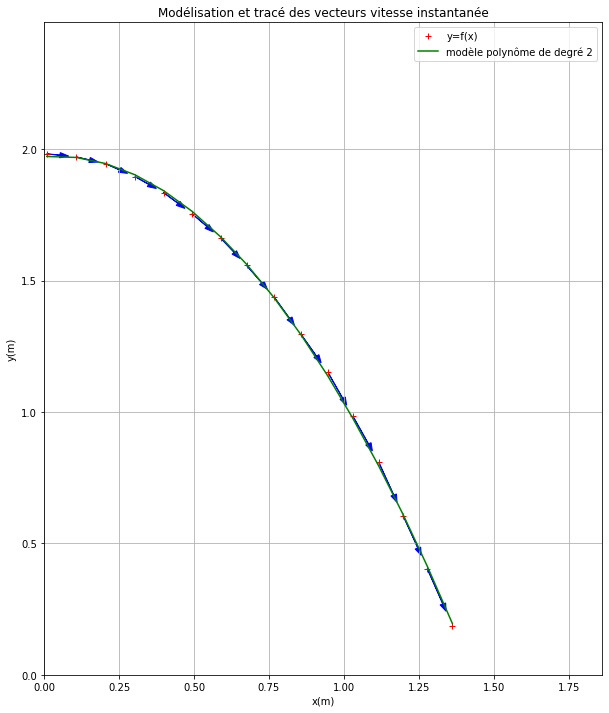

In [6]:
tableau = charge_fichier_csv("chute_balle.csv",delimiter=";",N=1)
t=tableau[0]
print(t)
x=tableau[1]
print(x)
y=tableau[2]
print(y)
ymodel=model_polynome_deg2(x,y)
print(ymodel)
vx=derivee(t,x)
vy=derivee(t,y)
graphvect(x,y,ymodel,vx,vy)